In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
from torch import nn

In [3]:
gen = torch.jit.load('files/models/glasses_gen.pt')

In [4]:
gen.eval()

RecursiveScriptModule(
  original_name=Generator
  (net): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(
      original_name=Sequential
      (0): RecursiveScriptModule(original_name=ConvTranspose2d)
      (1): RecursiveScriptModule(original_name=BatchNorm2d)
      (2): RecursiveScriptModule(original_name=ReLU)
    )
    (1): RecursiveScriptModule(
      original_name=Sequential
      (0): RecursiveScriptModule(original_name=ConvTranspose2d)
      (1): RecursiveScriptModule(original_name=BatchNorm2d)
      (2): RecursiveScriptModule(original_name=ReLU)
    )
    (2): RecursiveScriptModule(
      original_name=Sequential
      (0): RecursiveScriptModule(original_name=ConvTranspose2d)
      (1): RecursiveScriptModule(original_name=BatchNorm2d)
      (2): RecursiveScriptModule(original_name=ReLU)
    )
    (3): RecursiveScriptModule(
      original_name=Sequential
      (0): RecursiveScriptModule(original_name=ConvTranspose2d)
      (1): RecursiveScrip

In [5]:
z_dim = 100

In [6]:
torch.manual_seed(0)
nose_g = torch.randn(32, z_dim, 1, 1)

In [7]:
labels_g = torch.zeros(32, 2, 1, 1)

In [8]:
labels_g[:, 0, :, :] = 1

In [9]:
noise_and_labels_g = torch.cat((nose_g, labels_g), dim=1)

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
fake = gen(noise_and_labels_g.to(device))

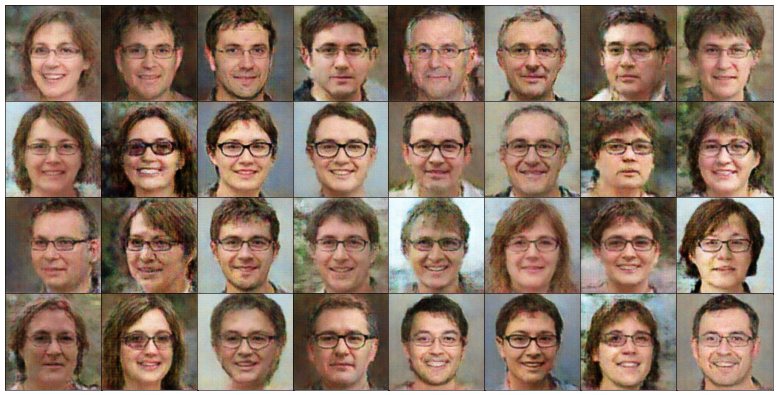

In [11]:
plt.figure(figsize=(20,10),dpi=50)
for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    img=(fake.cpu().detach()[i]/2+0.5).permute(1,2,0)
    plt.imshow(img.numpy())
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(wspace=-0.08,hspace=-0.01)
plt.show()

In [13]:
z_male_g = nose_g[3]

In [14]:
z_female_g = nose_g[8]

In [15]:
torch.manual_seed(0)
noise_ng = torch.randn(32, z_dim, 1, 1)
labels_ng = torch.zeros(32, 2, 1, 1)
labels_ng[:, 1, :, :] = 1

In [16]:
labels_and_noise_ng = torch.cat((noise_ng, labels_ng), dim=1)

In [18]:
fake = gen(labels_and_noise_ng.to(device))

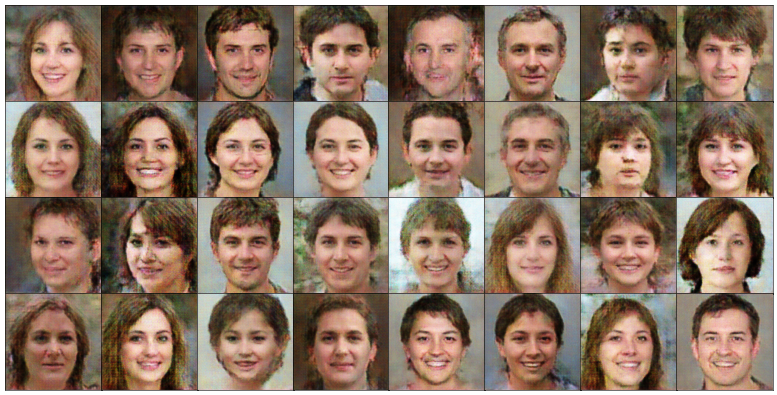

In [19]:
plt.figure(figsize=(20,10),dpi=50)
for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    img=(fake.cpu().detach()[i]/2+0.5).permute(1,2,0)
    plt.imshow(img.numpy())
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(wspace=-0.08,hspace=-0.01)
plt.show()

In [20]:
z_male_ng = noise_ng[2]
z_female_ng = noise_ng[8]

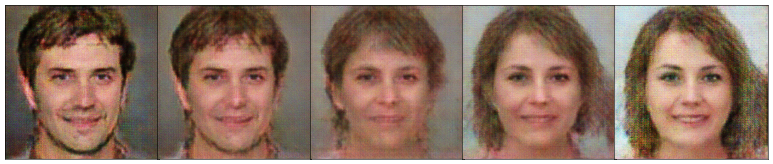

In [ ]:
weights=[0,0.25,0.5,0.75,1]
plt.figure(figsize=(20,4),dpi=50)
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    # change the value of z
    z=weights[i]*z_female_ng+(1-weights[i])*z_male_ng
    noise_and_labels=torch.cat([z.reshape(1, z_dim, 1, 1), labels_ng[0].reshape(1, 2, 1, 1)],dim=1).to(device)
    fake=gen(noise_and_labels).cpu().detach()
    img=(fake[0]/2+0.5).permute(1,2,0)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(wspace=-0.08,hspace=-0.01)
plt.show()

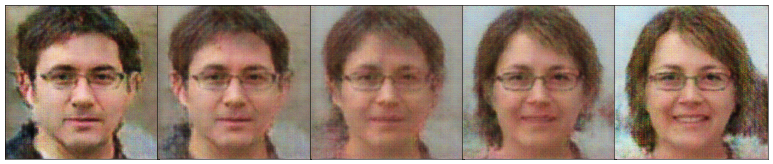

In [22]:

weights=[0,0.25,0.5,0.75,1]
plt.figure(figsize=(20,4),dpi=50)
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    # change the value of z
    z=weights[i]*z_female_g+(1-weights[i])*z_male_g
    noise_and_labels=torch.cat([z.reshape(1, z_dim, 1, 1), labels_g[0].reshape(1, 2, 1, 1)],dim=1).to(device)
    fake=gen(noise_and_labels).cpu().detach()
    img=(fake[0]/2+0.5).permute(1,2,0)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(wspace=-0.08,hspace=-0.01)
plt.show()

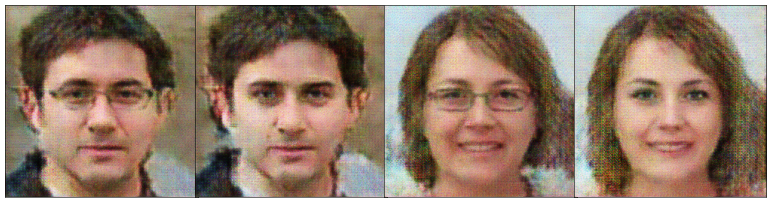

In [23]:
plt.figure(figsize=(20,5),dpi=50)
for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    p=i//2
    q=i%2
    z=z_female_g*p+z_male_g*(1-p)
    label=labels_ng[0]*q+labels_g[0]*(1-q)
    noise_and_labels=torch.cat(
    [z.reshape(1, z_dim, 1, 1),
    label.reshape(1, 2, 1, 1)],dim=1).to(device)
    fake=gen(noise_and_labels)
    img=(fake.cpu().detach()[0]/2+0.5).permute(1,2,0)
    plt.imshow(img.numpy())
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(wspace=-0.08,hspace=-0.01)
plt.show()

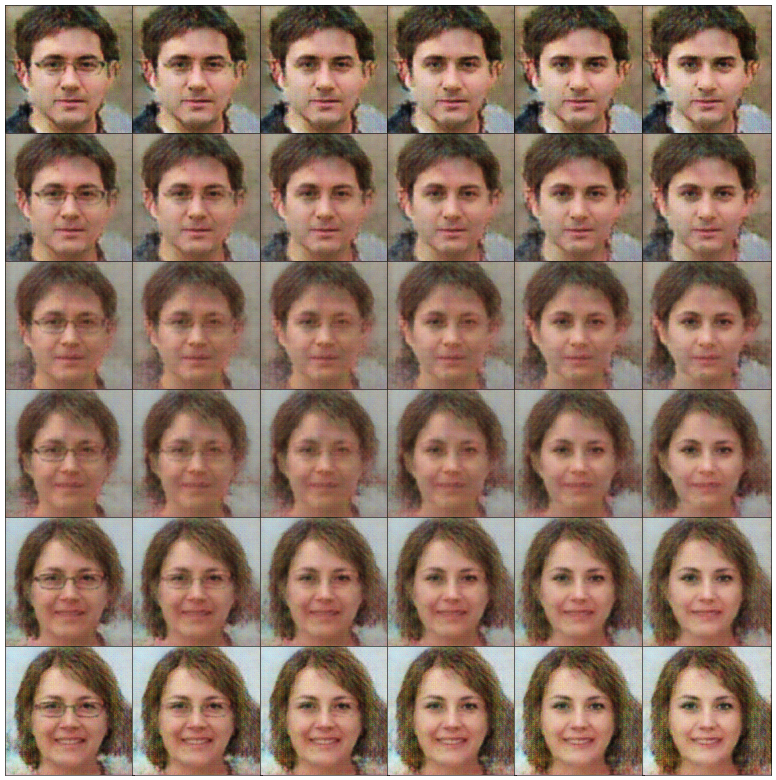

In [24]:
plt.figure(figsize=(20, 20), dpi=50)
for i in range(36):
    ax = plt.subplot(6, 6, i + 1)
    p = i // 6
    q = i % 6
    z=z_female_g*p/5+z_male_g*(1-p/5)
    label=labels_ng[0]*q/5+labels_g[0]*(1-q/5)
    noise_and_labels=torch.cat(
    [z.reshape(1, z_dim, 1, 1),
    label.reshape(1, 2, 1, 1)],dim=1).to(device)
    fake=gen(noise_and_labels)
    img=(fake.cpu().detach()[0]/2+0.5).permute(1,2,0)
    plt.imshow(img.numpy())
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(wspace=-0.08,hspace=-0.01)
plt.show()